In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
os.chdir('/content/drive/My Drive/practice')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn import preprocessing
from sklearn.metrics import recall_score


df=pd.read_csv('dataset.csv')
col=['id','diagnosis','forced_capacity','forced_expiration','zubrod_scale','pain','haemoptysis','dyspnoea',
     'cough' , 'weakness','size_of_tumour' ,'diabetas' , 'mi_6months' ,'pad' ,'smoker' ,'asthmtic' ,'age' ,'risk_1_year']
df.columns=col

features=df.iloc[ : , 1:-1].values
labels=df.iloc[ : , -1].values

coloumntransformer=ColumnTransformer([('encoder' , OneHotEncoder() , [0,3,4,5,6,7,8,9,10,11,12,13,14])] , remainder='passthrough')
features=np.array(coloumntransformer.fit_transform(features) , dtype=np.float32)

features=features[ : , 1:]
features=features[ : ,[0,1,2,3,4,5,6,7,9,10,12,14,16,18,20,22,23,24,26,28,30,32,34] ]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features[: ,[1,2,15]]=sc.fit_transform(features[: , [1,2,15]])

list1=[]
for i in labels:
  if i=='F':
    list1.append(1)
  elif i=='T':
    list1.append(0)
features.shape
labels=np.array(list1)
labels=labels.reshape(470,)

kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score(model,features_train , features_test , labeles_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_test,labels_test)
listsvm=[]
listnaive=[]
listlog=[]
for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  
  listsvm.append(get_score(SVC(), features_train , features_test , labels_train, labels_test))
  listnaive.append(get_score(BernoulliNB(), features_train , features_test , labels_train, labels_test))
lista=[]
a=np.mean(listsvm)
print("accuracy of test data svm", a)
b=np.mean(listnaive)
print("accuracy of  test data naive" , b)
g=''
lista.append(g)
lista.append(a)
lista.append(b)



#print listsvm
#that will give you the list of predictions for svm
# print listnaive
# that wil give you the list of predictions for naive bayes

accuracy of test data svm 0.851063829787234
accuracy of  test data naive 0.8127659574468085


In [ ]:

kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_scoree(model,features_train , features_test , labeles_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_train,labels_train)
trainsvm=[]
trainnaive=[]
listlog=[]
for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  
  trainsvm.append(get_scoree(SVC(), features_train , features_test , labels_train, labels_test))
  trainnaive.append(get_scoree(BernoulliNB(), features_train , features_test , labels_train, labels_test))
 
p=np.mean(trainsvm)
print("accuracy of training data svm", p)
q=np.mean(trainnaive)
print("accuracy of  training data naive" , q)
v=''
listt=[]
listt.append(v)
listt.append(p)
listt.append(q)

accuracy of training data svm 0.851063829787234
accuracy of  training data naive 0.8328605200945626


In [ ]:

list34=[]
list35=[]
def get_score2(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  labels_pred=model.predict(features_test)
  return (labels_test,labels_pred)
for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  
  list34.append(get_score2(SVC(), features_train , features_test , labels_train, labels_test))
  list35.append(get_score2(GaussianNB(), features_train , features_test , labels_train, labels_test))
c=np.mean(list34)
print("recall for svm" , c)
d=np.mean(list35)
print("recall for naive" , d)
recal=[]
y=''
recal.append(y)
recal.append(c)
recal.append(d)

recall for svm 0.925531914893617
recall for naive 0.44361702127659575


In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features[: ,:]=sc.fit_transform(features[: , :])

kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score3(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_test,labels_test)
listlog2=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  listlog2.append(get_score3(LogisticRegression(), features_train , features_test , labels_train, labels_test))
e=np.mean(listlog2)
print("logistic regression test data accuracy : " , e)
lista.append(e)




logistic regression test data accuracy :  0.8361702127659575


In [ ]:

kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_scoree3(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_train,labels_train)
trainlog=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  trainlog.append(get_scoree3(LogisticRegression(), features_train , features_test , labels_train, labels_test))
x=np.mean(trainlog)
print("logistic regression train data accuracy : " , x)
listt.append(x)

logistic regression train data accuracy :  0.8470449172576832


In [ ]:

kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score4(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  labels_pred1=model.predict(features_test)
  return recall_score(labels_test,labels_pred1)
listlog3=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  listlog3.append(get_score4(LogisticRegression(), features_train , features_test , labels_train, labels_test))
f=np.mean(listlog3)
print("logistic regression recall : " , f)
recal.append(f)

logistic regression recall :  0.9775855456343262


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features[: ,:]=sc.fit_transform(features[: , :])

clf = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=2)


clf.fit(features_train, labels_train)
labels_pred = clf.predict_proba(features_test)


kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score5(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_test,labels_test)
listrf=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  listrf.append(get_score5(RandomForestClassifier(), features_train , features_test , labels_train, labels_test))
p=np.mean(listrf)
print("Random Forest testing accuracy : " , p)
o=''
train1=[]
test1=[]
test1.append(o)
test1.append(p)
train1.append(o)


Random Forest testing accuracy :  0.823404255319149


In [ ]:
kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score5(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  return model.score(features_train,labels_train)
listrfa=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  listrfa.append(get_score5(RandomForestClassifier(), features_train , features_test , labels_train, labels_test))
pa=np.mean(listrfa)
print("Random Forest training accuracy : " , pa)
train1.append(pa)

Random Forest training accuracy :  0.9825059101654846


In [ ]:
kf=KFold(n_splits=10, random_state=None , shuffle=False)
def get_score6(model,features_train , features_test , lables_train, labels_test):
  model.fit(features_train,labels_train)
  labels_pred2=model.predict(features_test)
  return recall_score(labels_test,labels_pred2)
listrf2=[]

for train_index,test_index in kf.split(features):
  features_train , features_test , labels_train, labels_test= features[train_index], features[test_index],labels[train_index],labels[test_index]
  listrf2.append(get_score6(RandomForestClassifier(), features_train , features_test , labels_train, labels_test))
yu=np.mean(listrf2)
print("Random Forest recall : " , yu)
testrecal=[]
testrecal.append(o)
testrecal.append(yu)

Random Forest recall :  0.9323657942977585


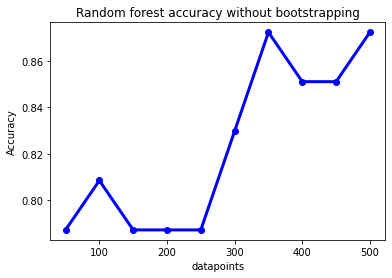

In [ ]:
import matplotlib.pyplot as plt
ratio=[50,100,150,200,250,300,350,400,450,500]
mn = np.array(listrf)
xy = np.array(ratio)

plt.plot(xy , mn , color='blue' ,marker='o' , linewidth=3)

plt.xlabel('datapoints')
plt.title('Random forest accuracy without bootstrapping')
plt.ylabel('Accuracy')
plt.savefig("acc1.jpg")



In [ ]:

mn = np.array(listrf)
xy = np.array(ratio)




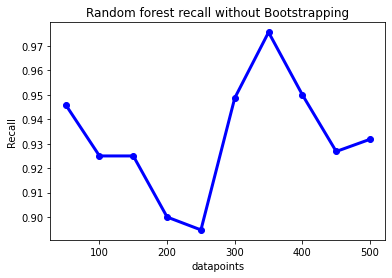

In [ ]:
import matplotlib.pyplot as plt
ratio=[50,100,150,200,250,300,350,400,450,500]
nm = np.array(listrf2)
yx = np.array(ratio)

plt.plot(yx , nm , color='blue' ,marker='o' , linewidth=3)

plt.xlabel('datapoints')
plt.title('Random forest recall without Bootstrapping')
plt.ylabel('Recall')
plt.savefig("rec1.jpg")




with bootstraping


 **With Bootstraping**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from random import randrange


listsvm1=[]
listnaive1=[]
listlog1=[]
svmrecall=[]
logrecall=[]
naiverecall=[]
listrf3 = []
listrf4 = []
rfrecall = []
trainsvm1=[]
trainlog1=[]
trainnaive1=[]


def subsample(dataset, ratio):
	sample = [];n_sample = round(len(dataset) * ratio)
	while len(sample) < n_sample:
		index = randrange(len(dataset))
		sample.append(dataset.iloc[index , : ])
	return sample

for ratio in [0.1,0.2 ,0.3, 0.4,0.5,0.6,0.7,0.8,0.9]:
  sample = subsample(df, ratio)
  df1=pd.DataFrame(sample )
  features=df1.iloc[: , 1:-1].values
  labels=df1.iloc[ : , -1].values
  coloumntransformer=ColumnTransformer([('encoder' , OneHotEncoder() , [0,3,4,5,6,7,8,9,10,11,12,13,14])] , remainder='passthrough')
  features=np.array(coloumntransformer.fit_transform(features) , dtype=np.float32)
  
  
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  features[: ,[1,2,15]]=sc.fit_transform(features[: , [1,2,15]])
  list1=[]
  from sklearn.preprocessing import StandardScaler
  sc=StandardScaler()
  features[: ,:]=sc.fit_transform(features[: , :])
  for i in labels:
    if i=='F':
      list1.append(1)
    elif i=='T':
      list1.append(0)
    features.shape
  labels=np.array(list1)
  c=int(470*ratio)
  labels=labels.reshape(c,)
  from sklearn.model_selection import train_test_split
  features_train , features_test , labels_train, labels_test=train_test_split(features,labels,test_size=0.2,random_state=0)
  model=SVC()
  model.fit(features_train,labels_train)
  n=model.score(features_train,labels_train)
  trainsvm1.append(n)
  a=model.score(features_test,labels_test)
  listsvm1.append(a)
  labels_pred=model.predict(features_test)
  r=recall_score(labels_test,labels_pred)
  svmrecall.append(r)

  model1=BernoulliNB()
  model1.fit(features_train,labels_train)
  q=model1.score(features_train,labels_train)
  trainnaive1.append(q)
  b=model1.score(features_test,labels_test)
  listnaive1.append(b)
  labels_pred1=model1.predict(features_test)
  r1=recall_score(labels_test,labels_pred1)
  naiverecall.append(r1)
  
  model2=LogisticRegression()
  model2.fit(features_train,labels_train)
  p=model2.score(features_train,labels_train)
  trainlog1.append(p)
  c=model2.score(features_test,labels_test)
  listlog1.append(c)
  labels_pred2=model2.predict(features_test)
  r2=recall_score(labels_test,labels_pred2)
  logrecall.append(r2)

  model3 = RandomForestClassifier(n_estimators=100, max_depth= 4, random_state=2)
  model3.fit(features_train, labels_train)
  d_test=model3.score(features_test,labels_test)
  listrf3.append(d_test)
  d_train=model3.score(features_train,labels_train)
  listrf4.append(d_train)
  labels_pred3=model3.predict(features_test)
  r3=recall_score(labels_test,labels_pred3)
  rfrecall.append(r3)
f=''
test1.append(f)
u=np.mean(listrf3)
test1.append(u)
s=np.mean(listrf4)
train1.append(f)
train1.append(s)
n=np.mean(trainsvm1)
ty=np.mean(rfrecall)
testrecal.append(f)
testrecal.append(ty)
print(" accuracy for svm training data" , n)
print()
q=np.mean(trainnaive1)
print("accuracy for naive traiing data",q)
print()
p=np.mean(trainlog1)
print("accuracy for logistic taining data" , p)
print()
m=''
listt.append(m)
listt.append(n)
listt.append(q)
listt.append(p)
mean1=np.mean(listsvm1)
print()
print('svm accuracy for test data:',mean1)

mean2=np.mean(listnaive1)
print()
print('naive accuracy for test data:',mean2)
mean3=np.mean(listlog1)
print()
print('logisic accuracy for test data:',mean3)
b=''
lista.append(b)
lista.append(mean1)
lista.append(mean2)
lista.append(mean3)
l=np.mean(svmrecall)
j=np.mean(naiverecall)
h=np.mean(logrecall)
r=''
recal.append(r)
recal.append(l)
recal.append(j)
recal.append(h)



 accuracy for svm training data 0.9103753746602066

accuracy for naive traiing data 0.8654574418237324

accuracy for logistic taining data 0.8965813806129397


svm accuracy for test data: 0.8835649729840291

naive accuracy for test data: 0.8174649924350662

logisic accuracy for test data: 0.828773357238385


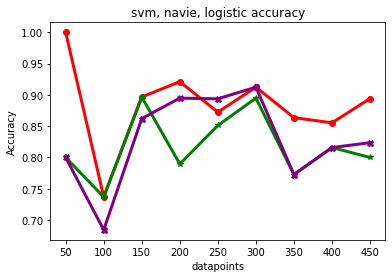

In [ ]:
ratio=[50,100,150,200,250,300,350,400,450]
plt.plot(ratio , listsvm1 , color='red' ,marker='o' , linewidth=3)
plt.plot(ratio , listnaive1 , color='green' ,marker='*' , linewidth=3)
plt.plot(ratio , listlog1 , color='purple' ,marker='X' , linewidth=3)
plt.title('svm, navie, logistic accuracy')
plt.xlabel('datapoints')

plt.ylabel('Accuracy')
plt.savefig("acc2.jpg")


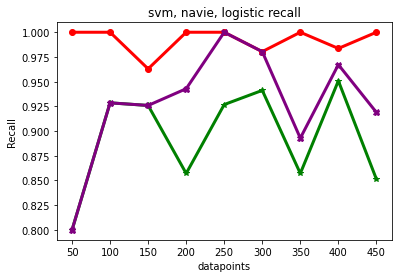

In [ ]:
ratio=[50,100,150,200,250,300,350,400,450]
plt.plot(ratio , svmrecall , color='red' ,marker='o' , linewidth=3)
plt.plot(ratio , naiverecall , color='green' ,marker='*' , linewidth=3)
plt.plot(ratio , logrecall , color='purple' ,marker='X' , linewidth=3)
plt.title('svm, navie, logistic recall')
plt.xlabel('datapoints')

plt.ylabel('Recall')
plt.savefig("rec2.jpg")


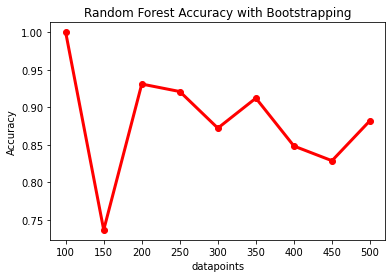

In [ ]:
ratio=[100,150,200,250,300,350,400,450,500]
plt.plot(ratio , listrf3 , color='red' ,marker='o' , linewidth=3)
plt.title('Random Forest Accuracy with Bootstrapping')
plt.xlabel('datapoints')

plt.ylabel('Accuracy')
plt.savefig("acc3.jpg")


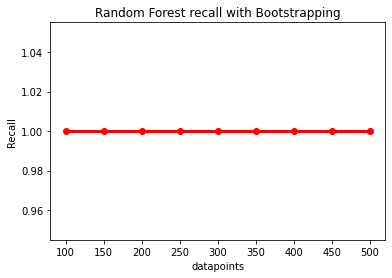

In [ ]:
ratio=[100,150,200,250,300,350,400,450,500]
plt.plot(ratio ,rfrecall  , color='red' ,marker='o' , linewidth=3)
plt.title('Random Forest')
plt.xlabel('datapoints')
plt.title('Random Forest recall with Bootstrapping')
plt.ylabel('Recall')
plt.savefig("rec3.jpg")


**TABLE FOR NAIVE BAYES , LOGISTIC REG. ,SVM **

In [ ]:
f2=pd.DataFrame()
listw=['WITHOUT BOOTSTRAPING' , 'SVM' ,'Naive Bayes' , 'Logistic reg.' , 'WTH BOOTSTRAPING','SVM', ' Naive Bayes' , 'Logistic reg.' ]
f2['bootstraping']=listw

f2['Testing Accuracy']=lista
f2['Training Accuracy']=listt
f2['Recall Test Data']=recal
f2

,bootstraping,Testing Accuracy,Training Accuracy,Recall Test Data
0,WITHOUT BOOTSTRAPING,,,
1,SVM,0.851064,0.851064,0.925532
2,Naive Bayes,0.812766,0.832861,0.443617
3,Logistic reg.,0.83617,0.847045,0.977586
4,WTH BOOTSTRAPING,,,
5,SVM,0.905922,0.91709,0.994968
6,Naive Bayes,0.826714,0.867171,0.890425
7,Logistic reg.,0.891218,0.904733,0.964176


**TABLE FOR RANDOM FOREST**

In [ ]:
f3=pd.DataFrame()
listr=['WITHOUT BOOTSTRAPING','Random forest','WITH BOOTSTRAPING','Random forest']
f3['Bootstraping']=listr
f3['Test Data Accuracy']=test1
f3['Train Data Accuracy']=train1
f3['Recall Test Data']=testrecal
f3

,Bootstraping,Test Data Accuracy,Train Data Accuracy,Recall Test Data
0,WITHOUT BOOTSTRAPING,,,
1,Random forest,0.806383,0.98227,0.929738
2,WITH BOOTSTRAPING,,,
3,Random forest,0.90559,0.899729,1


**FEATURE SELECTION**

In [ ]:
import statsmodels.api as sm
import numpy as np

features_obj = features[:, :]
features_obj = sm.add_constant(features_obj)
while (True):
    regressor_OLS = sm.OLS(endog = labels,exog =features_obj).fit()
    p_values = regressor_OLS.pvalues
    if p_values.max() > 0.05 :
        features_obj = np.delete(features_obj, p_values.argmax(),1)
    else:
        break
features_obj.shape

(423, 5)